In [118]:
#Import the libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sn

In [119]:
#get the current directory
print(os.getcwd())

C:\Users\BrindhaM\Documents\CelStrat MlL\My Site\Polynomial and logistic Regression


In [120]:
#Read the files
df=pd.read_csv('HomeBuyer.csv')

In [121]:
#Print the shape
df.shape

(400, 3)

In [122]:
#Display the file
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [123]:
#find if any null columns are there for cleanup
#Can also use df.isnull().sum
df.isna().sum() 

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [124]:
#Lets find the correlation matrix for the independent variable..
#We do correlation to find correlation among predictors(here age & salary)
corrmatrix=df.corr()
print(corrmatrix)

                      Age  EstimatedSalary  Purchased
Age              1.000000         0.155238   0.622454
EstimatedSalary  0.155238         1.000000   0.362083
Purchased        0.622454         0.362083   1.000000


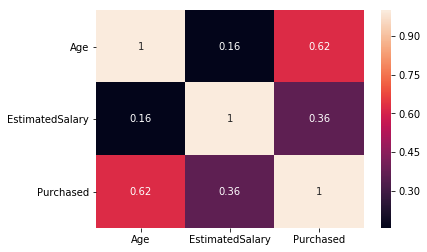

In [125]:
#Print the heatmap using seaborn
sn.heatmap(corrmatrix,annot=True)
#TConc:here is not much correlation between age and est.salary..

In [126]:
#Split the data into predicto-r and dependant
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]

In [127]:
#print and data
Y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      1
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     0
29     0
      ..
370    1
371    1
372    0
373    1
374    0
375    1
376    0
377    0
378    1
379    1
380    0
381    1
382    1
383    1
384    1
385    1
386    1
387    0
388    1
389    1
390    1
391    1
392    1
393    1
394    0
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [128]:
#Print the data
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
5,27,58000
6,27,84000
7,32,150000
8,25,33000
9,35,65000


In [129]:
#split the dataset into training and test set. We will use 75/25 approach
#import the library
from sklearn.model_selection import train_test_split
#Remember the order : X followed by Y
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [130]:
#print the shapes
print(X_Train.shape,X_Test.shape,Y_Train.shape,Y_Test.shape)
#Dimension of X_Train and X_test must match

(300, 2) (100, 2) (300,) (100,)


In [131]:
#Perform feature scaling
#Feature Scaling to bring all values to same magnitudes
from sklearn.preprocessing import StandardScaler
#assign the scaler to independent scaler
independent_scaler=StandardScaler()
#fit the transformation for indendent variables i.e X_train/X_test
#Fit and Transform
X_Train=independent_scaler.fit_transform(X_Train)
X_Test=independent_scaler.transform(X_Test)

In [132]:
#Print the standardized
X_Train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [133]:
#Fit the line using logistic regression
#Import the library
from sklearn.linear_model import LogisticRegression
#assign to a variable
LRClassifier=LogisticRegression(random_state = 0)
#fit the model using the classifier : Remember predictor followed by dependent variable
LRClassifier.fit(X_Train,Y_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [134]:
#Predict the probablites
probab=LRClassifier.predict_proba(X_Test)
#print the probabiities
print(probab)
#To read the output-> The first column predicts the prbability of 0 and second
#column is probability of one

[[0.8835313  0.1164687 ]
 [0.82871699 0.17128301]
 [0.8004837  0.1995163 ]
 [0.90739447 0.09260553]
 [0.89926493 0.10073507]
 [0.99169199 0.00830801]
 [0.98410063 0.01589937]
 [0.26459889 0.73540111]
 [0.99384437 0.00615563]
 [0.4907332  0.5092668 ]
 [0.96238257 0.03761743]
 [0.96947917 0.03052083]
 [0.83490307 0.16509693]
 [0.62448827 0.37551173]
 [0.98369807 0.01630193]
 [0.65886488 0.34113512]
 [0.7144286  0.2855714 ]
 [0.98708287 0.01291713]
 [0.01150228 0.98849772]
 [0.95626217 0.04373783]
 [0.90763174 0.09236826]
 [0.03668135 0.96331865]
 [0.71749074 0.28250926]
 [0.11706887 0.88293113]
 [0.99524108 0.00475892]
 [0.02710673 0.97289327]
 [0.91943183 0.08056817]
 [0.92088349 0.07911651]
 [0.80168341 0.19831659]
 [0.83888382 0.16111618]
 [0.97879075 0.02120925]
 [0.70119816 0.29880184]
 [0.06769477 0.93230523]
 [0.84353432 0.15646568]
 [0.98491826 0.01508174]
 [0.99630128 0.00369872]
 [0.97919709 0.02080291]
 [0.93195984 0.06804016]
 [0.97118522 0.02881478]
 [0.4448538  0.5551462 ]


In [135]:
#Predict the class
prediction=LRClassifier.predict(X_Test)
#predicts the class the output belong to

In [136]:
#Mdeol evaluaton using confusion matrix
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix (Y_Test, prediction)

#print the confusion matrix
confusionMatrix

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [137]:
#Lets visualize
import numpy as np
#mshgrid creates 2d arrays from 1d array
xx,yy=np.mgrid[-5:5:.01,-5:5:.01]
#XX.ravel converts to flat 1D array
#print(xx.shape)
#np.c_will concatenate along the second axis
grid=np.c_[xx.ravel(),yy.ravel()]
#print(grid)
#calculate the probability of getting 1 for different input data and
#store the output prbablity in shape of xx
probs=LRClassifier.predict_proba(grid)[:,1]
#Before Reshaping check the shape of probs is same as that of xx.shape
probs=probs.reshape(xx.shape)
#print the probs
print(probs)

[[5.31793363e-08 5.37693571e-08 5.43659241e-08 ... 3.17626301e-03
  3.21139025e-03 3.24690469e-03]
 [5.42871110e-08 5.48894224e-08 5.54984164e-08 ... 3.24221299e-03
  3.27806718e-03 3.31431655e-03]
 [5.54179616e-08 5.60328197e-08 5.66544997e-08 ... 3.30952776e-03
  3.34612386e-03 3.38312326e-03]
 ...
 [9.78235714e-01 9.78469395e-01 9.78700622e-01 ... 9.99999629e-01
  9.99999633e-01 9.99999637e-01]
 [9.78670360e-01 9.78899475e-01 9.79126182e-01 ... 9.99999636e-01
  9.99999640e-01 9.99999644e-01]
 [9.79096511e-01 9.79321145e-01 9.79543416e-01 ... 9.99999644e-01
  9.99999648e-01 9.99999651e-01]]


C:\Users\BrindhaM\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


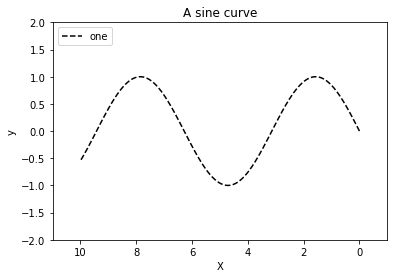

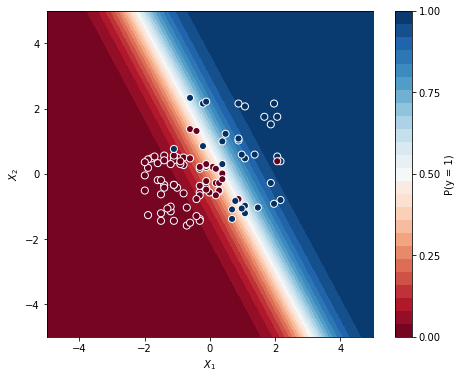

In [152]:
#Plot the same in matplot library
#Set the plot size to width=8 and height=6
f,ax=plt.subplots(figsize=(8,6))
#Plot the points and draw a filled contour plot for plotting 3d in 2d
contour=ax.contourf(xx,yy,probs,25,cmap="RdBu",vmin=0,vmax=1)
ax_c=f.colorbar(contour)

#Set the label for colorba
ax_c.set_label("P(y = 1)")
#Set the ticks
ax_c.set_ticks([0,0.25,0.5,0.75,1])

#do scatter plot  
#X axis is age , Y axis is salry and classifier divides into 0/1 as can be seen by the probablity
#C is the color seuqncer ..Apples red for 0 and blue for 1..
ax.scatter(X_Test[:,0],X_Test[:,1],c=(Y_Test==1),s=50,cmap="RdBu",edgecolor="white",linewidth=1)

ax.set(aspect="equal",xlim=(-5,5),ylim=(-5,5),xlabel="$X_1$",ylabel="$X_2$")

#Show
plt.show()

## 